# Assignment 1

In [1]:
#Grigori Kostanyan

## Dataset 


Dataset "BusinessPlanData.dta" is based on simplified version of the dataset collected as part of the field experiment in Niger that is now published in American Economic Review.

The paper is: McKenzie, D. (2017). Identifying and spurring high-growth entrepreneurship: experimental evidence from a business plan competition. American Economic Review, 107(8), 2278-2307.
The paper and the full dataset can be found here: https://www.aeaweb.org/articles?id=10.1257/aer.20151404

Basically, the author runs a field experiment with a pool of entrepreneurs applying to a national business plan competition in Nigeria. The last stage of the selection process randomly selected 720 semi-finalists (out of 1,920 semi-finalists) to win the business plan program. The program consisted of an initial four-day training, a grant paid in four tranches, some mentoring, and two additional two-day training events. The entrepreneurs were then tracked through surveys over a period of five years.
The paper basically compares the group of semi-finalists randomly allocated to the business plan treatment (called ‘treatment’ group) to the control group of all the other semi-finalists who were not allocated to the business plan program.
The published paper looks at whether the business plan treatment had any significant effect on firms’ (self-reported) survival, profits, sales, and employment, but it also contains data on how many hours the entrepreneurs reported to work in their business in a usual week three years after the business plan competition.

Our main variable of interest (the dependent variable) for the task is the variable ‘hoursusualweek’, a continuous variable counting the number of hours that the entrepreneurs worked in a normal week three years after the intervention.

### Load BusinessPlanData data in dta format and assign it to a variable 
Hint: It is not mandatory to convert categoricals

In [194]:
import pandas as pd
df = pd.read_stata('BusinessPlanData.dta')

### Drop the columns where the type is object 

In [195]:
df = df.select_dtypes(exclude='object')

### Drop the rows where "hoursusualweek" column is nan 

In [196]:
df.drop(df[ df.hoursusualweek.isnull() ].index, inplace = True)

### Drop the columns where input contains nan 

In [197]:
df.dropna(axis='columns', inplace=True)

### Drop the columns which names contain "id" string 

In [198]:
for col in df.columns:
    if 'id' in col:
        del df[col]

### Scale "revenues" feature to [0,10] range using Min Max Scaler 

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,10))
df['revenues'] = scaler.fit_transform(df[['revenues']])
df.shape

(918, 55)

### Use Linear Regression and VIF to drop correlated features. For VIF threshold use 5

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.select_dtypes(['number'])
X.drop('hoursusualweek', axis='columns', inplace=True)

Y=df['hoursusualweek']

vif_values=pd.DataFrame(columns=['feature', 'vif'])

for i in range(len(X.columns)):
    a=variance_inflation_factor(X.values, i)
    vif_values.loc[i]={'feature':X.columns[i], 'vif':a}
    if a > 5:
        df.drop(X.columns[i], axis='columns', inplace=True)

### Use descriptive statistics and visualization methods you know so far (box plot, density function, scatter plot, etc.). Dig deeper and see what you can find :)

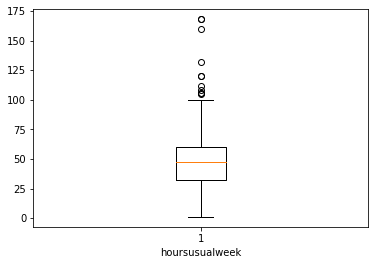

In [211]:
plt.boxplot(Y)
plt.xlabel('hoursusualweek')
plt.show()

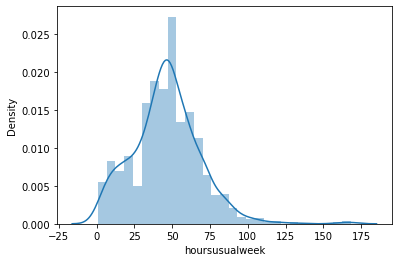

In [221]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
sns.distplot(Y)
plt.show()

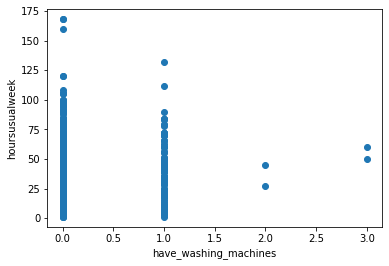

In [210]:
import matplotlib.pyplot as plt

plt.scatter(X["have_washing_machines"],Y)
plt.xlabel("have_washing_machines")
plt.ylabel("hoursusualweek")
plt.show()

### Find the feature that has biggest Pearson correlation with dependent variable ("hoursusualweek") 

In [202]:
from scipy.stats import pearsonr

df = df.select_dtypes(['number'])

cor=-1
feature='undefined'
for i in range(len(df.columns)):
    if df.columns[i] != 'hoursusualweek':
        pcor, a= pearsonr(df[df.columns[i]], df['hoursusualweek'])
        if pcor > cor:
            cor=pcor
            feature=df.columns[i]

### Plot Heatmap 

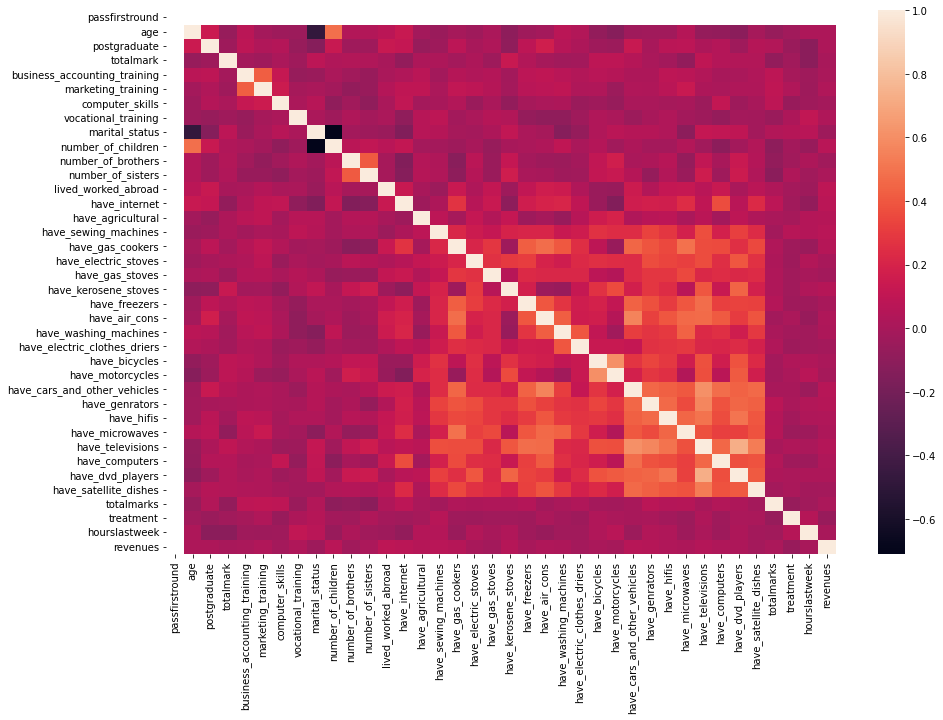

In [215]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(method="pearson"));

### Use Feature Importance method from Decision Trees to find important variables and compare it with VIF findings

In [204]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X, Y)
imp_values = pd.DataFrame({"feature":X.columns, "importance": dtr.feature_importances_})

In [205]:
imp_values.head(5)

,feature,importance
0,passfirstround,0.000000
1,age,0.005799
2,postgraduate,0.000000
3,totalmark,0.024499
4,business_accounting_training,0.000000


In [206]:
vif_values.head(5)

,feature,vif
0,passfirstround,195.926083
1,age,1.457624
2,postgraduate,1.120877
3,totalmark,1.100776
4,business_accounting_training,1.294772


In [207]:
vif_imp_values=pd.DataFrame(columns=['feature', 'vif', 'importance'])
for i in range(len(X.columns)):
    vif_imp_values.loc[i]={'feature':X.columns[i], 'vif':vif_values['vif'][i], 'importance':imp_values['importance'][i]}
vif_imp_values.head(5)    

,feature,vif,importance
0,passfirstround,195.926083,0.000000
1,age,1.457624,0.005799
2,postgraduate,1.120877,0.000000
3,totalmark,1.100776,0.024499
4,business_accounting_training,1.294772,0.000000
